# Preliminary Experiment


Assumes that preprocessing step is already done using the matlab functions (output is table which we will convert to pandas dataframe)
* `generate_data.m`
* `resampleRun.m`

In [1]:
%matplotlib widget

In [2]:
# !pip install crepe # do this once

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from scipy.io import wavfile
import librosa
import crepe

In [4]:
df = pd.read_csv("preliminary_data.csv")

In [5]:
id_columns = df.columns[0:3]
dat_columns = df.columns[3:]

In [6]:
df["data"] = df.apply(lambda x : np.array(x[dat_columns].values), axis=1)

In [7]:
df = df.drop(labels=dat_columns, axis=1)

In [8]:
class_sizes = [len(df.loc[df["label"] == "song"]), len(df.loc[df["label"] == "ad"])]

In [9]:
print(f"Songs: {class_sizes[0]} Ads: {class_sizes[1]}")

Songs: 1992 Ads: 266


## Exploration

In [49]:
sample_song = df.loc[df["label"] == "song"].sample(random_state=23)["data"].values[0]
sample_ad = df.loc[df["label"] == "ad"].sample(random_state=23)["data"].values[0]

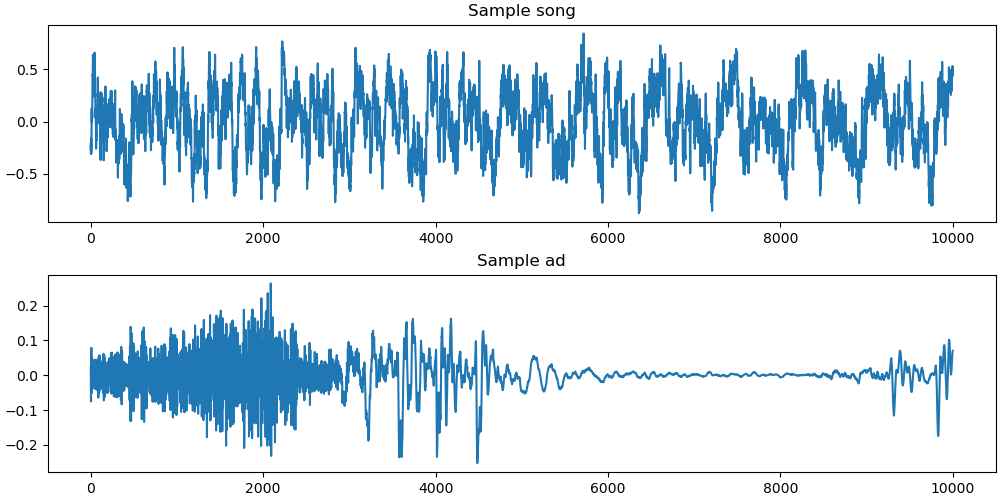

In [57]:
fig, ax = plt.subplots(2, 1, layout="constrained", figsize=(10, 5))

ax = ax.flatten()

ax[0].plot(sample_song)
ax[0].set_title("Sample song")

ax[1].plot(sample_ad)
ax[1].set_title("Sample ad")

plt.savefig("graphics/sample_plots.png", dpi=400)

plt.show()

In [10]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n(N={absolute:d})"

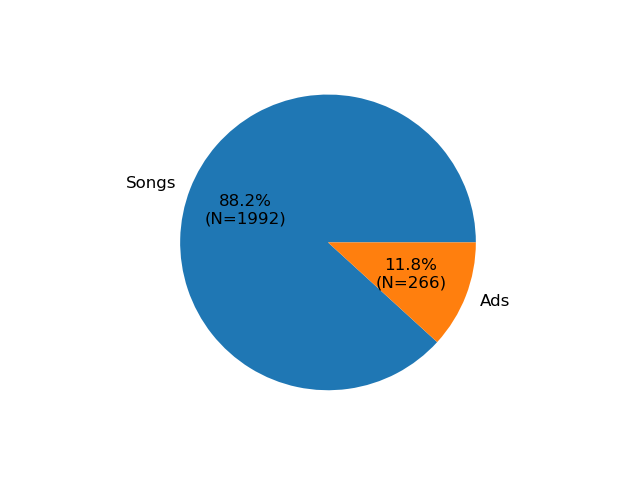

In [59]:
plt.close("all")

fig, ax = plt.subplots()

ax.pie(class_sizes, labels=["Songs", "Ads"], autopct=lambda pct : func(pct, class_sizes), textprops={"fontsize" : 12})

plt.savefig("graphics/preliminary_class_distribution.png", dpi=400)

plt.show()

## Feature extraction

### Pitch

Using [crepe](https://pypi.org/project/crepe/)

In [58]:
songs = [x for x in os.listdir("resampled_songs") if "16kHz" in x]
ads = [x for x in os.listdir("resampled_ads") if "16kHz" in x]

In [59]:
idx = 0

In [60]:
f_s, audio = wavfile.read(f"resampled_songs/{songs[idx]}")

In [ ]:
time, frequency, confidence, activation = crepe.predict(audio, f_s, viterbi=True)

### Tempo

Using [librosa](https://librosa.org/doc/0.10.1/generated/librosa.beat.beat_track.html#librosa.beat.beat_track)

In [43]:
idx = 0
y = df.iloc[idx]["data"].astype(np.float32)
f_s = df.iloc[idx]["sampleRate"]

In [44]:
tempo, beats = librosa.beat.beat_track(y=y, sr=f_s)

In [45]:
tempo

120.18531976744185

### MFCC

In [46]:
mfcc = librosa.feature.mfcc(y=y, sr=f_s)

In [48]:
mfcc.shape

(20, 20)

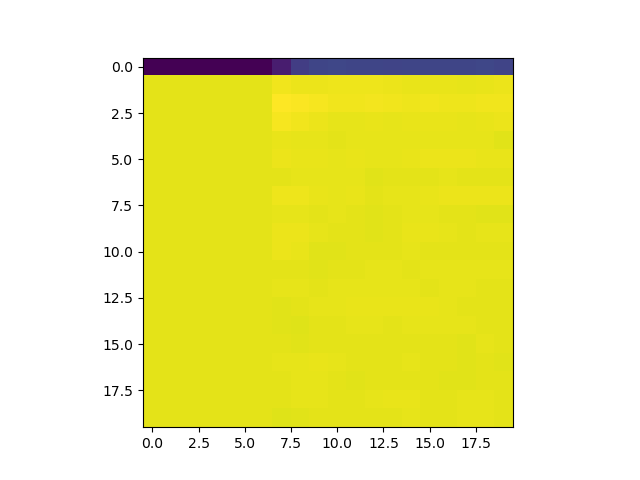

In [60]:
plt.close("all")

fig = plt.figure()

plt.imshow(mfcc)

plt.show()